## 計算梯度 (對單一值)

In [6]:
#y = X ^ 2
def func(x):
    return x ** 2

func(3)

9

In [26]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)

In [27]:
dfunc(func,3)

6.000100000012054

In [11]:
def tfunc(f,x,t):
    d= dfunc(f,x)
    y=f(x)-d*x
    return d*t+y


Populating the interactive namespace from numpy and matplotlib


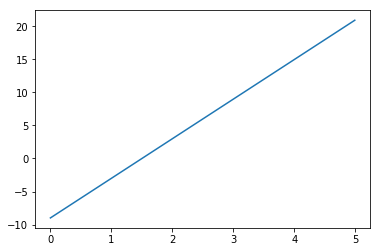

In [16]:
%pylab inline
from matplotlib import pyplot as plt
import numpy as np
x2= np.arange(0,5, 0.01)
y2= tfunc(func,3, x2)
plt.plot(x2, y2)

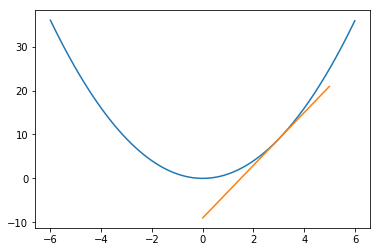

In [19]:
# 繪製 x ^ 2 
x = np.arange(-6,6, 0.01)
y= func(x)
plt.plot(x,y)

# 繪製x = 3 時的切線
x2= np.arange(0,5, 0.01)
y2= tfunc(func,3, x2)
plt.plot(x2, y2)

In [20]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [21]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):
    x = init_x
    res = [x]
    for i in range(epochs):
        grad = dfunc(func,x)
        x = x - grad * lr
        res.append(x)
    return np.array(res)


In [22]:
x = gradient_descent(func, -5, lr=0.8)

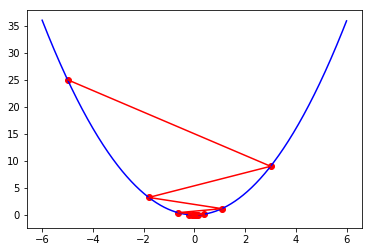

In [23]:
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')

In [28]:
x = gradient_descent(func, -5, lr=1)

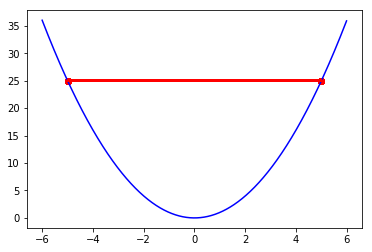

In [29]:
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')


In [30]:
x = gradient_descent(func, -5, lr=0.01)

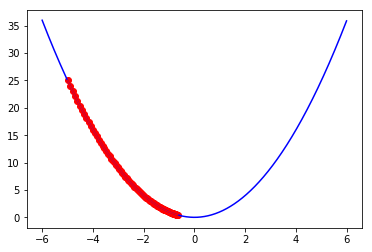

In [31]:
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')


## 計算梯度(針對矩陣)

In [33]:
# 初始網路 
x = np.array([0.6, 0.9])
np.random.seed(42)
weight= np.random.randn(2,3)
z= np.dot(x, weight)
z

array([ 1.66875536, -0.29369662,  0.17788986])

In [35]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

# 取得預測值 y_hat
y_hat= softmax_function(z)
y_hat

array([0.73222998, 0.10288817, 0.16488185])

In [36]:
y_hat.sum()

0.9999999999999999

In [38]:


# 計算代價(損失)
y= np.array([0,0,1])


def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

cross_entropy_err(y_hat,y)


1.8025260716416405

In [39]:
weight= np.random.randn(2,3)
weight

array([[ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

In [40]:
np.zeros_like(weight)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [43]:
def dfunc(f,x):
    h= 1e-4
    grad = np.zeros_like(x)
    it= np.nditer(x, flags=['multi_index'])
    while not it.finished:
        
        idx= it.multi_index
        print(idx)
        tmp_val=x[idx]
        x[idx]= float(tmp_val)+h 
        fxh1=f(x) # f(x+h)
        x[idx]= tmp_val-h
        fxh2=f(x) # f(x-h)
        grad[idx]=(fxh1- fxh2)/(2*h)
        x[idx]= tmp_val
        it.iternext()
    return grad


In [45]:
def predict(x):
    return np.dot(x, weight)

def loss(x,y):
    z= predict(x)
    y_hat= softmax_function(z)
    loss= cross_entropy_err(y_hat,y)
    return loss

func= lambda w: loss(x,y)
dfunc(func, weight)


(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)


array([[ 0.43905941,  0.10910469, -0.5481641 ],
       [ 0.65858911,  0.16365704, -0.82224615]])